In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.metrics import classification_report
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow_datasets as tfds

In [2]:
np.set_printoptions(precision=3,suppress=True)

In [3]:
url="https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv"

In [4]:
abalone_train=pd.read_csv(url,
                          names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

In [5]:
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [6]:
abalone_features=abalone_train.copy()
abalone_labels=abalone_features.pop('Age')

In [7]:
abalone_features=np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [8]:
abalone_model=tf.keras.Sequential([
                                    tf.keras.layers.Dense(64),
                                    tf.keras.layers.Dense(1)
])
abalone_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [9]:
abalone_model.fit(abalone_features,abalone_labels,epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 60.0779 - accuracy: 0.0000e+00
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 11.3731 - accuracy: 3.0120e-04
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 8.4057 - accuracy: 3.0120e-04
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 7.9482 - accuracy: 3.0120e-04
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 7.5283 - accuracy: 3.0120e-04
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 7.2069 - accuracy: 3.0120e-04
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 6.9379 - accuracy: 3.0120e-04
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 6.7668 - accuracy: 3.0120e-04
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 6.6484 - accuracy: 3.0120e-04
Epoch 10/10
104/104 [==============================] - 0s 2ms/

In [11]:
normalize=tf.keras.layers.experimental.preprocessing.Normalization()

In [12]:
normalize.adapt(abalone_features)

In [13]:
norm_abalone_model=tf.keras.Sequential([
                                        normalize,
                                        tf.keras.layers.Dense(64),
                                        tf.keras.layers.Dense(1)
])

In [14]:
norm_abalone_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

In [15]:
norm_abalone_model.fit(abalone_features,abalone_labels,epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 93.3272 - accuracy: 0.0000e+00
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 54.9722 - accuracy: 0.0000e+00
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 17.4668 - accuracy: 3.0120e-04
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 5.9985 - accuracy: 3.0120e-04
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0820 - accuracy: 3.0120e-04
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0027 - accuracy: 3.0120e-04
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9773 - accuracy: 3.0120e-04
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9913 - accuracy: 3.0120e-04
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9389 - accuracy: 3.0120e-04
Epoch 10/10
104/104 [==============================] - 0s 2ms

In [16]:
titanic_url="https://storage.googleapis.com/tf-datasets/titanic/train.csv"

titanic=pd.read_csv(titanic_url)

In [17]:
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [18]:
titanic_features=titanic.copy()
titanic_labels=titanic_features.pop('survived')

In [19]:


input=tf.keras.Input(shape=(),dtype=tf.float32)

result=2*input+1

result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [20]:
calc=tf.keras.Model(inputs=input,outputs=result)

In [21]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [22]:

inputs={}

for name,column in titanic_features.items():
  dtype=column.dtype
  if dtype==object:
    dtype=tf.string
  else:
    dtype=tf.float32
  inputs[name]=tf.keras.Input(shape=(1,),name=name,dtype=dtype)
inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>}

In [23]:
numeric_inputs={name:input for name,input in inputs.items()
               if input.dtype==tf.float32}
x=tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm=tf.keras.layers.experimental.preprocessing.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs=norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [24]:
preprocessed_inputs=[all_numeric_inputs]

In [25]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = tf.keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

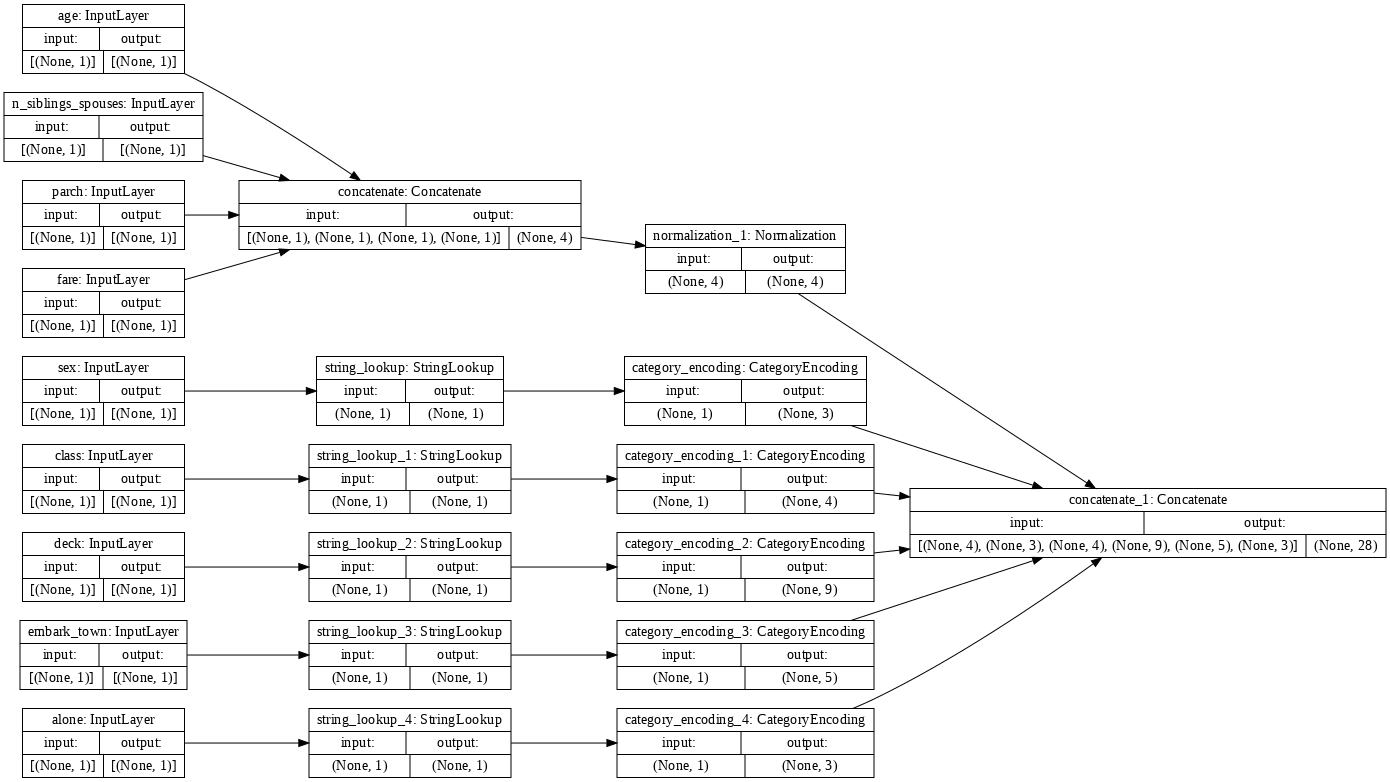

In [26]:
preprocessed_inputs_cat=tf.keras.layers.Concatenate()(preprocessed_inputs)
titanic_preprocessing=tf.keras.Model(inputs,preprocessed_inputs_cat)
tf.keras.utils.plot_model(model=titanic_preprocessing,rankdir='LR',dpi=72,show_shapes=True)

In [27]:
titanic_features_dict={name:np.array(value) for name,value in titanic_features.items()}

In [28]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [29]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [30]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 3ms/step - loss: 0.6316
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5178
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4784
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4566
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4423
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4331
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4291
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4241
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4227
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4227


In [31]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

INFO:tensorflow:Assets written to: test/assets
